In [24]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
df = pd.read_csv(r".\Datasets\step1_cleanData.csv")
df.head()

C:\Users\sumit\AppData\Local\Temp\ipykernel_344\3491303188.py:1: DtypeWarning: Columns (3,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r".\Datasets\step1_cleanData.csv")


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,6055,149.171.126.5,54145,tcp,FIN,0.072974,4238,60788,31,...,0,13,13,6,7,1,1,2,Not_Known_Attack,0
1,59.166.0.0,7832,149.171.126.3,5607,tcp,FIN,0.144951,5174,91072,31,...,0,13,13,6,7,1,1,2,Not_Known_Attack,0
2,59.166.0.8,11397,149.171.126.6,21,tcp,FIN,0.116107,2934,3742,31,...,1,1,2,7,5,1,1,4,Not_Known_Attack,0
3,59.166.0.0,3804,149.171.126.3,53,udp,CON,0.000986,146,178,31,...,0,13,13,6,7,1,1,2,Not_Known_Attack,0
4,59.166.0.8,14339,149.171.126.6,14724,tcp,FIN,0.038480,8928,320,31,...,0,8,20,7,5,1,1,4,Not_Known_Attack,0


In [26]:
df.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label'],
      dtype='object')

In [ ]:
# Handle missing values, if any
df.dropna(inplace=True)

In [32]:
print((df['Label']==0).sum()), print((df['Label']==1).sum())

647252
52749


(None, None)

In [33]:
data_0 = df[df['Label']== 0]
data_1 = df[df['Label']== 1]

In [34]:
balanced_df= pd.concat([
    data_0.sample(n = 22215, random_state = 42),
    data_1.sample(n = 22215, random_state = 42),
])

In [35]:
balanced_df.shape

(44430, 49)

In [36]:
balanced_df.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label'],
      dtype='object')

In [37]:
# Select features for training and labels (Label)
X = balanced_df[[
    'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload', 'Dload',
    'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz',
    'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Sintpkt', 'Dintpkt', 'tcprtt',
    'synack', 'ackdat'
]]
y = balanced_df['Label']

In [38]:
# Tranformation the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#RANDOM FOREST

In [40]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

In [41]:
# Evaluate the Random Forest model
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

Random Forest Performance:
Accuracy: 0.9942606347062796
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4485
           1       0.99      1.00      0.99      4401

    accuracy                           0.99      8886
   macro avg       0.99      0.99      0.99      8886
weighted avg       0.99      0.99      0.99      8886

Confusion Matrix:
 [[4437   48]
 [   3 4398]]


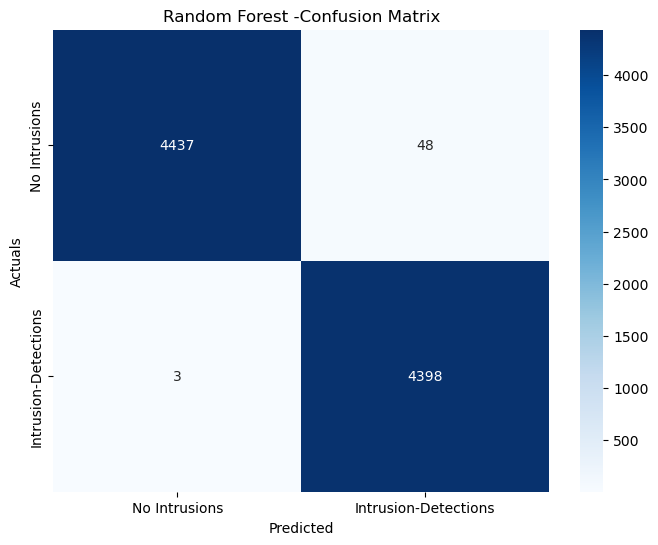

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import numpy as np

# Calculate the confusion matrix and other metrics
cm = confusion_matrix(y_test, rf_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Intrusions", "Intrusion-Detections"], yticklabels=["No Intrusions", "Intrusion-Detections"])
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.title("Random Forest -Confusion Matrix")
plt.show()

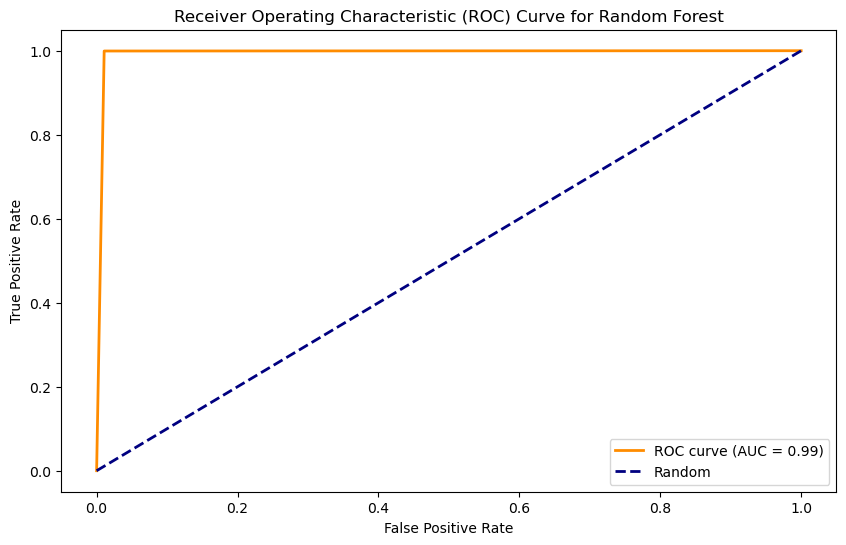

In [43]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, rf_predictions)
roc_auc = auc(fpr, tpr)

# Compute precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, rf_predictions)
average_precision = auc(recall, precision)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()